In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso

import  numpy as np
import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

In [2]:
data_mat = pd.read_csv('./student-mat.csv')
data_por = pd.read_csv('./student-por.csv')

In [3]:
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
data = pd.concat([data_mat, data_por])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null

In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
categorical_cols=data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [9]:
for var in categorical_cols:
    lb = LabelEncoder()
    full_var_data = (data[var]).astype('str')
    temp = lb.fit_transform(np.array(full_var_data))
    data[var] = lb.transform(np.array(data[var] ).astype('str'))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
school        1044 non-null int64
sex           1044 non-null int64
age           1044 non-null int64
address       1044 non-null int64
famsize       1044 non-null int64
Pstatus       1044 non-null int64
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null int64
Fjob          1044 non-null int64
reason        1044 non-null int64
guardian      1044 non-null int64
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null int64
famsup        1044 non-null int64
paid          1044 non-null int64
activities    1044 non-null int64
nursery       1044 non-null int64
higher        1044 non-null int64
internet      1044 non-null int64
romantic      1044 non-null int64
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null int64
Dalc      

In [11]:
# Basic Feature engineering

data['Talc']=(data.Dalc*5+data.Walc*2)/7
data=data.drop(['Dalc','Walc'],1)

In [12]:
data.corr()["G3"]

school       -0.127114
sex          -0.031472
age          -0.125282
address       0.117696
famsize       0.061209
Pstatus      -0.030693
Medu          0.201472
Fedu          0.159796
Mjob          0.105640
Fjob          0.040541
reason        0.108671
guardian     -0.077320
traveltime   -0.102627
studytime     0.161629
failures     -0.383145
schoolsup    -0.079346
famsup        0.013313
paid         -0.049388
activities    0.033998
nursery       0.039950
higher        0.236578
internet      0.107064
romantic     -0.098363
famrel        0.054461
freetime     -0.064890
goout        -0.097877
health       -0.080079
absences     -0.045671
G1            0.809142
G2            0.910743
G3            1.000000
Talc         -0.136932
Name: G3, dtype: float64

In [13]:
# Target Label = Final Grade G3

X = data.drop('G3', axis = 1)
Y = data['G3']

In [14]:
# Split 75:25::train:test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [15]:
def generate_report(model, y_pred, y_test):
    print("Model Performance:")
    print("Explained variance regression score (0 to 1)", end=":")
    print(explained_variance_score(y_pred, y_test))
    print("Root mean squared error", end=":")
    print(sqrt(mean_squared_error(y_pred, y_test)))
    print("Mean absolute error",end=":")
    print(mean_absolute_error(y_pred, y_test))
    
    compare = pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Index": range(len(y_pred))}).set_index("Index")
    compare.plot(figsize=(24, 8))
    plt.title("Actual vs Predicted")
    plt.ylabel("Grade")
    plt.show()

## XGBoost Regressor

In [16]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, subsample=0.7, max_depth=25)

model.fit(X_train,y_train)
model.score(X_train, y_train)

0.9942202120269348

In [17]:
y_pred=model.predict(X_test)

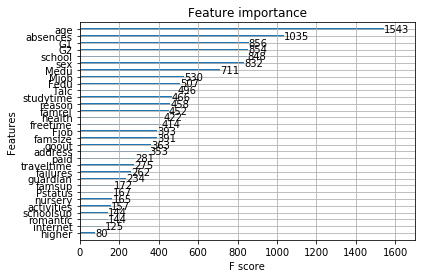

In [18]:
from xgboost import plot_importance

plot_importance(model)
plt.show()

Model Performance:
Explained variance regression score (0 to 1):0.8084074605584952
Root mean squared error:1.6577529706516205
Mean absolute error:1.0013191588080248


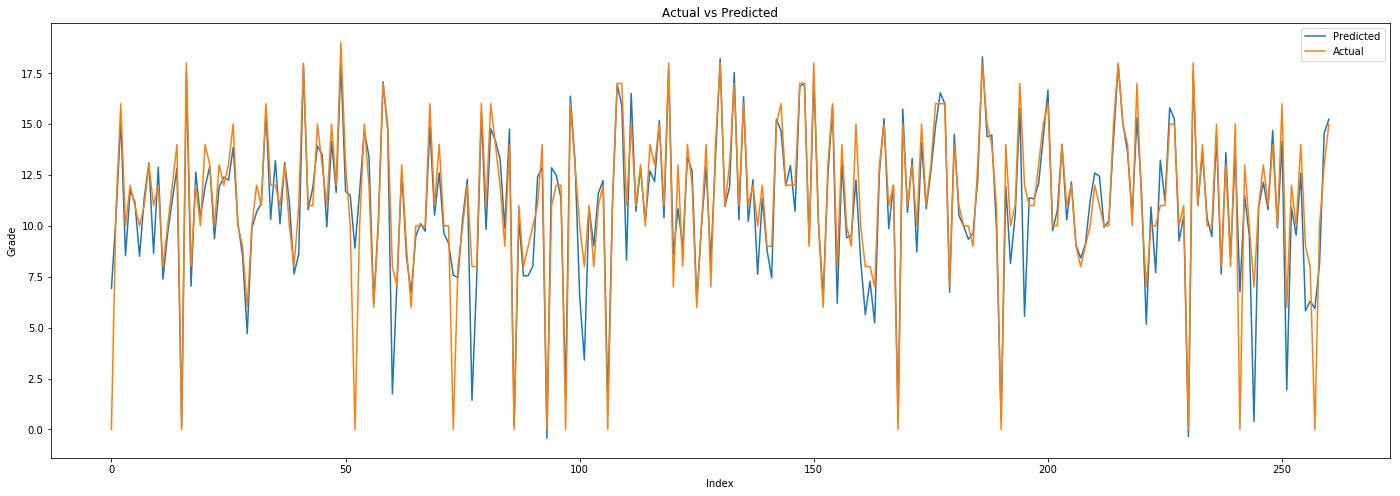

In [19]:
generate_report(model, y_pred, y_test)

## Linear Regression

In [20]:
# Choose attributes with high correlation with the output label.
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X[["G1", "G2"]], Y, test_size=0.25)

model = LinearRegression()

In [21]:
model.fit(Xl_train, yl_train)
model.score(Xl_train, yl_train)

0.817027732813639

In [22]:
yl_pred = model.predict(Xl_test)

Model Performance:
Explained variance regression score (0 to 1):0.869273743411708
Root mean squared error:1.3749628367956925
Mean absolute error:0.8998254182476322


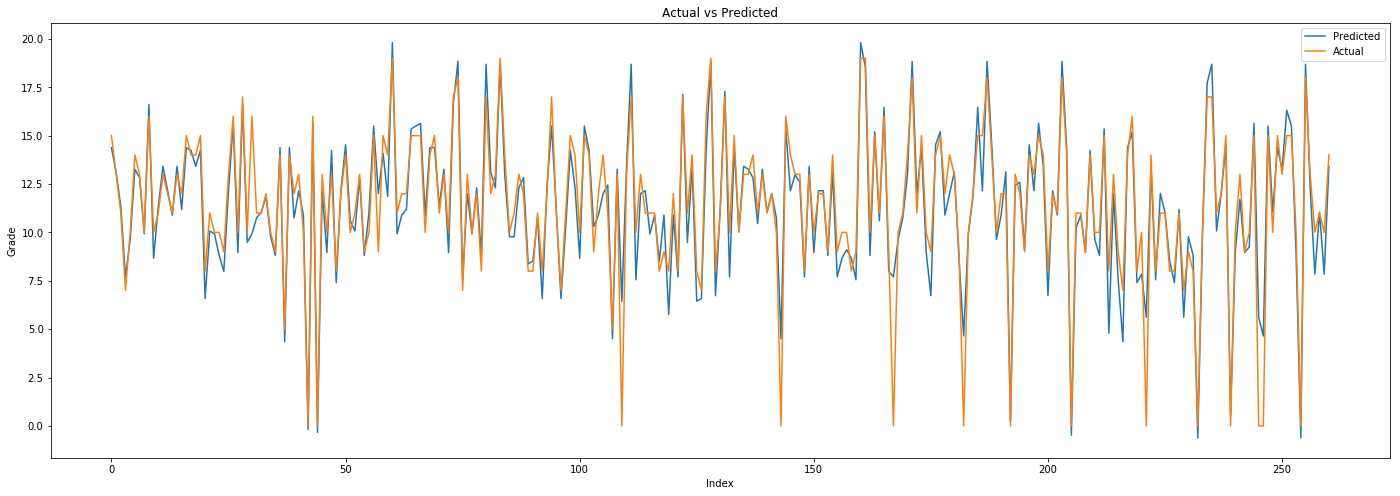

In [23]:
generate_report(model, yl_pred, yl_test)

## Lasso

In [24]:
model = Lasso()

In [25]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8228436405538269

In [26]:
y_pred = model.predict(X_test)

Model Performance:
Explained variance regression score (0 to 1):0.7900058342832269
Root mean squared error:1.542974654300289
Mean absolute error:0.8179517412730114


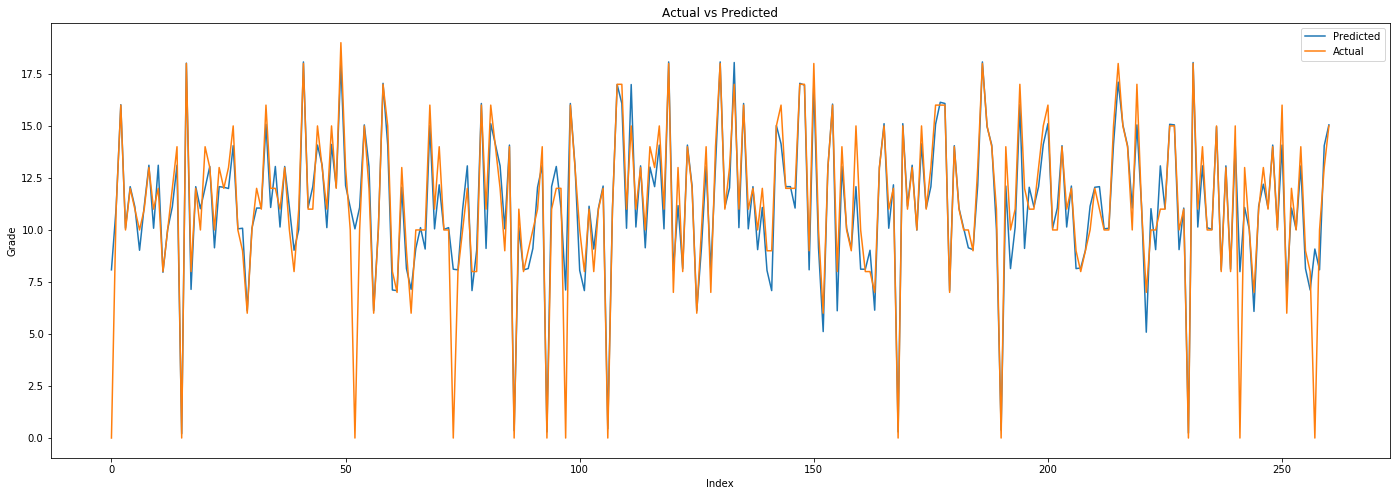

In [27]:
generate_report(model, y_pred, y_test)

## Experimentation and Analysis

- Metrics used for evaluation.
    - Explained variance regression score
    - Root mean squared error
    - Mean absolute error
<br><br><br>
- Performance wise rankings.
    1. Linear Regression
    2. XGBoost Regressor
    3. Lasso

** On multiple iterations it is observed that XGBoost Regressor and Linear Regression model interchange places based on the random sampling bais.**

**A linear model outperforms other models because of very high correlation(~0.9) of the G3 with the attributes used in training.**


**XGBoost outperforms the lasso simply because it is an ensamble method and uses many trees to take a decision, so it gains power by repeating itself. Tree based aproaches are very robust. They can work on a wide variety of problems and can capture dependencies in ways linear models can not. Boosting often improves performance.**